In [140]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.dpi"] = 256

In [141]:
df = pd.read_excel('Online_Retail001.xlsx')

## 對 Quantity 進行資料清理

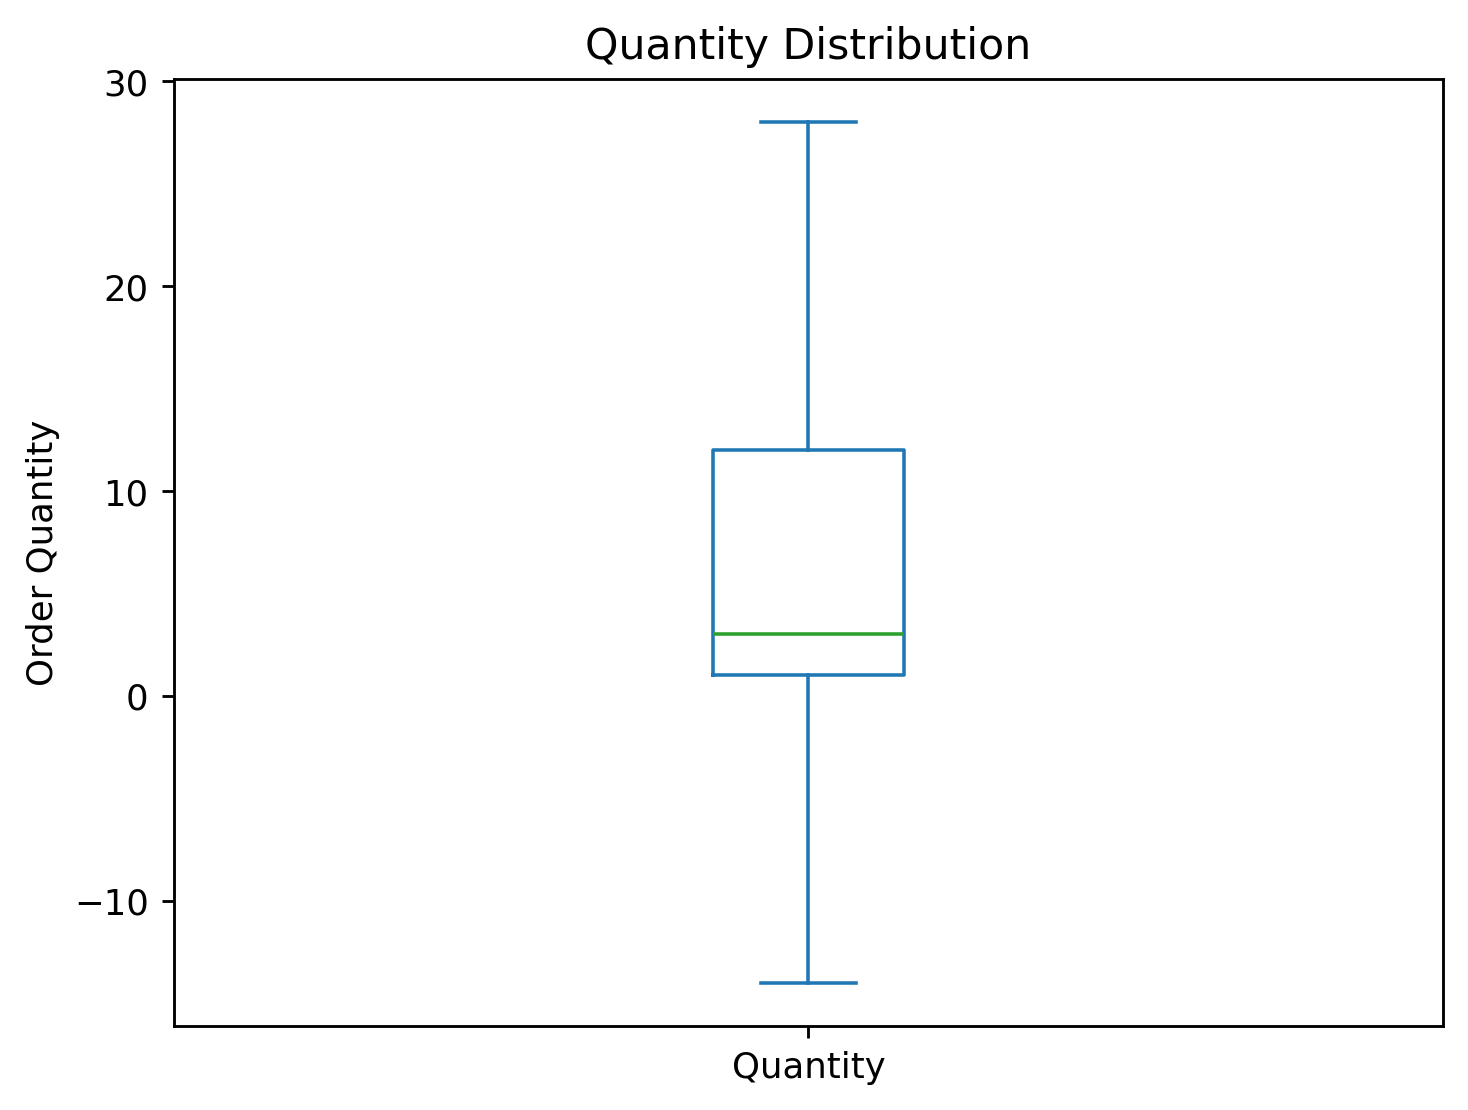

In [142]:
df['Quantity'].plot(kind='box', showfliers=False)

plt.ylabel('Order Quantity')
plt.title('Quantity Distribution')
plt.show()

In [143]:
df = df[df['Quantity'] > 0]
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,9791.000000,9791,9791.000000,7349.000000
mean,10.833010,2011-07-02 07:04:05.987131136,3.778015,15269.442373
min,1.000000,2010-12-01 08:45:00,0.000000,12347.000000
25%,1.000000,2011-03-24 13:08:00,1.250000,13923.000000
50%,4.000000,2011-07-15 10:27:00,2.080000,15128.000000
75%,12.000000,2011-10-18 10:17:30,4.130000,16764.000000
max,4000.000000,2011-12-09 12:50:00,736.380000,18283.000000
std,57.552806,NaN,14.334337,1705.369038


## 顧客編號空值清理

In [144]:
df['CustomerID'].isnull().sum()

np.int64(2442)

In [145]:
df.dropna(subset=['CustomerID'], inplace=True)
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,7349.000000,7349,7349.000000,7349.000000
mean,12.666349,2011-07-07 20:03:14.108041728,2.962449,15269.442373
min,1.000000,2010-12-01 08:45:00,0.001000,12347.000000
25%,2.000000,2011-04-03 15:22:00,1.250000,13923.000000
50%,6.000000,2011-07-24 11:54:00,1.950000,15128.000000
75%,12.000000,2011-10-18 15:22:00,3.750000,16764.000000
max,2880.000000,2011-12-09 12:50:00,300.000000,18283.000000
std,45.978377,NaN,5.326559,1705.369038


## 計算銷售總額

In [146]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
1,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom,20.34
2,536381,21934,SKULL SHOULDER BAG,10,2010-12-01 09:41:00,1.65,15311.0,United Kingdom,16.50
3,536381,47580,TEA TIME DES TEA COSY,2,2010-12-01 09:41:00,2.55,15311.0,United Kingdom,5.10
4,536384,22424,ENAMEL BREAD BIN CREAM,8,2010-12-01 09:53:00,10.95,18074.0,United Kingdom,87.60


## 訂單匯總

根據顧客編號匯總訂單資料，算出銷售額平均、次數、最大間隔時間、每次平均間隔時間

In [147]:
invoice_summary_df = df.groupby('InvoiceNo').agg({
    'InvoiceDate': "max",
    'Sales': "sum",
    'CustomerID': "max",
    'Country': "max",
}).reset_index()  # 編號順序化

invoice_summary_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536370,2010-12-01 08:45:00,45.00,12583.0,France
1,536375,2010-12-01 09:32:00,20.34,17850.0,United Kingdom
2,536381,2010-12-01 09:41:00,21.60,15311.0,United Kingdom
3,536384,2010-12-01 09:53:00,87.60,18074.0,United Kingdom
4,536385,2010-12-01 09:56:00,25.50,17420.0,United Kingdom
...,...,...,...,...,...
5230,581486,2011-12-09 09:38:00,41.60,17001.0,United Kingdom
5231,581538,2011-12-09 11:34:00,6.96,14446.0,United Kingdom
5232,581582,2011-12-09 12:21:00,17.40,17581.0,United Kingdom
5233,581586,2011-12-09 12:49:00,30.00,13113.0,United Kingdom


## 前五名銷售額訂單

In [148]:
invoice_summry_df_top5 = invoice_summary_df.sort_values(
    by='Sales', ascending=False).head().reset_index()

invoice_summry_df_top5

,index,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,3354,566934,2011-09-15 15:34:00,2290.00,18102.0,United Kingdom
1,188,538063,2010-12-09 13:44:00,1914.24,18102.0,United Kingdom
2,2399,558526,2011-06-30 11:01:00,1044.00,17949.0,United Kingdom
3,1144,546789,2011-03-17 10:17:00,990.00,15769.0,United Kingdom
4,3355,566936,2011-09-15 15:35:00,916.00,18102.0,United Kingdom


## 訂單匯總

根據顧客編號，月份匯總訂單資料，
算出銷售日期、銷售總額、顧客、國家

In [149]:
monthly_repeat_customers_df = (
    invoice_summary_df
        .groupby([
            pd.Grouper(key='InvoiceDate', freq='ME'), 'CustomerID'
        ])
        # filter>1 代表用兩個維度做分群後，筆數>1，即同一個月同一顧客有1筆以上消費
        .filter(lambda x: len(x) > 1)
)

monthly_repeat_customers_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
1,536375,2010-12-01 09:32:00,20.34,17850.0,United Kingdom
5,536396,2010-12-01 10:51:00,31.86,17850.0,United Kingdom
7,536407,2010-12-01 11:34:00,11.10,17850.0,United Kingdom
22,536557,2010-12-01 14:41:00,28.90,17841.0,United Kingdom
27,536591,2010-12-01 16:57:00,10.20,14606.0,United Kingdom
...,...,...,...,...,...
5207,581334,2011-12-08 12:07:00,4.95,17841.0,United Kingdom
5217,581405,2011-12-08 13:50:00,12.88,13521.0,United Kingdom
5223,581433,2011-12-08 15:54:00,35.13,14911.0,EIRE
5224,581449,2011-12-08 17:37:00,3.75,12748.0,United Kingdom


目的：計算每個月回頭客數量、計算每個月所有顧客數量、計算每月回頭客人數與每月所有頧客人數比例

計算每個月回頭客數量：

In [150]:
monthly_repeat_customers_df = monthly_repeat_customers_df.set_index('InvoiceDate').resample('ME')['CustomerID'].nunique()

monthly_repeat_customers_df

InvoiceDate
2010-12-31    44
2011-01-31    22
2011-02-28    19
2011-03-31    31
2011-04-30    22
2011-05-31    26
2011-06-30    19
2011-07-31    27
2011-08-31    22
2011-09-30    31
2011-10-31    40
2011-11-30    93
2011-12-31     6
Freq: ME, Name: CustomerID, dtype: int64

計算每個月所有顧客數量：

In [151]:
monthly_unique_customers_df = df.set_index('InvoiceDate').resample('ME')['CustomerID'].nunique()

monthly_unique_customers_df

InvoiceDate
2010-12-31    317
2011-01-31    270
2011-02-28    246
2011-03-31    340
2011-04-30    269
2011-05-31    349
2011-06-30    348
2011-07-31    338
2011-08-31    296
2011-09-30    464
2011-10-31    513
2011-11-30    645
2011-12-31    207
Freq: ME, Name: CustomerID, dtype: int64

計算每月回頭客比例：每個月回頭客數量/每個月所有顧客數量

In [152]:
monthly_repeat_percentage = monthly_repeat_customers_df / monthly_unique_customers_df

monthly_repeat_percentage.fillna(0)

InvoiceDate
2010-12-31    0.138801
2011-01-31    0.081481
2011-02-28    0.077236
2011-03-31    0.091176
2011-04-30    0.081784
2011-05-31    0.074499
2011-06-30    0.054598
2011-07-31    0.079882
2011-08-31    0.074324
2011-09-30    0.066810
2011-10-31    0.077973
2011-11-30    0.144186
2011-12-31    0.028986
Freq: ME, Name: CustomerID, dtype: float64

## 繪圖：每個月回頭客數量, 折線圖

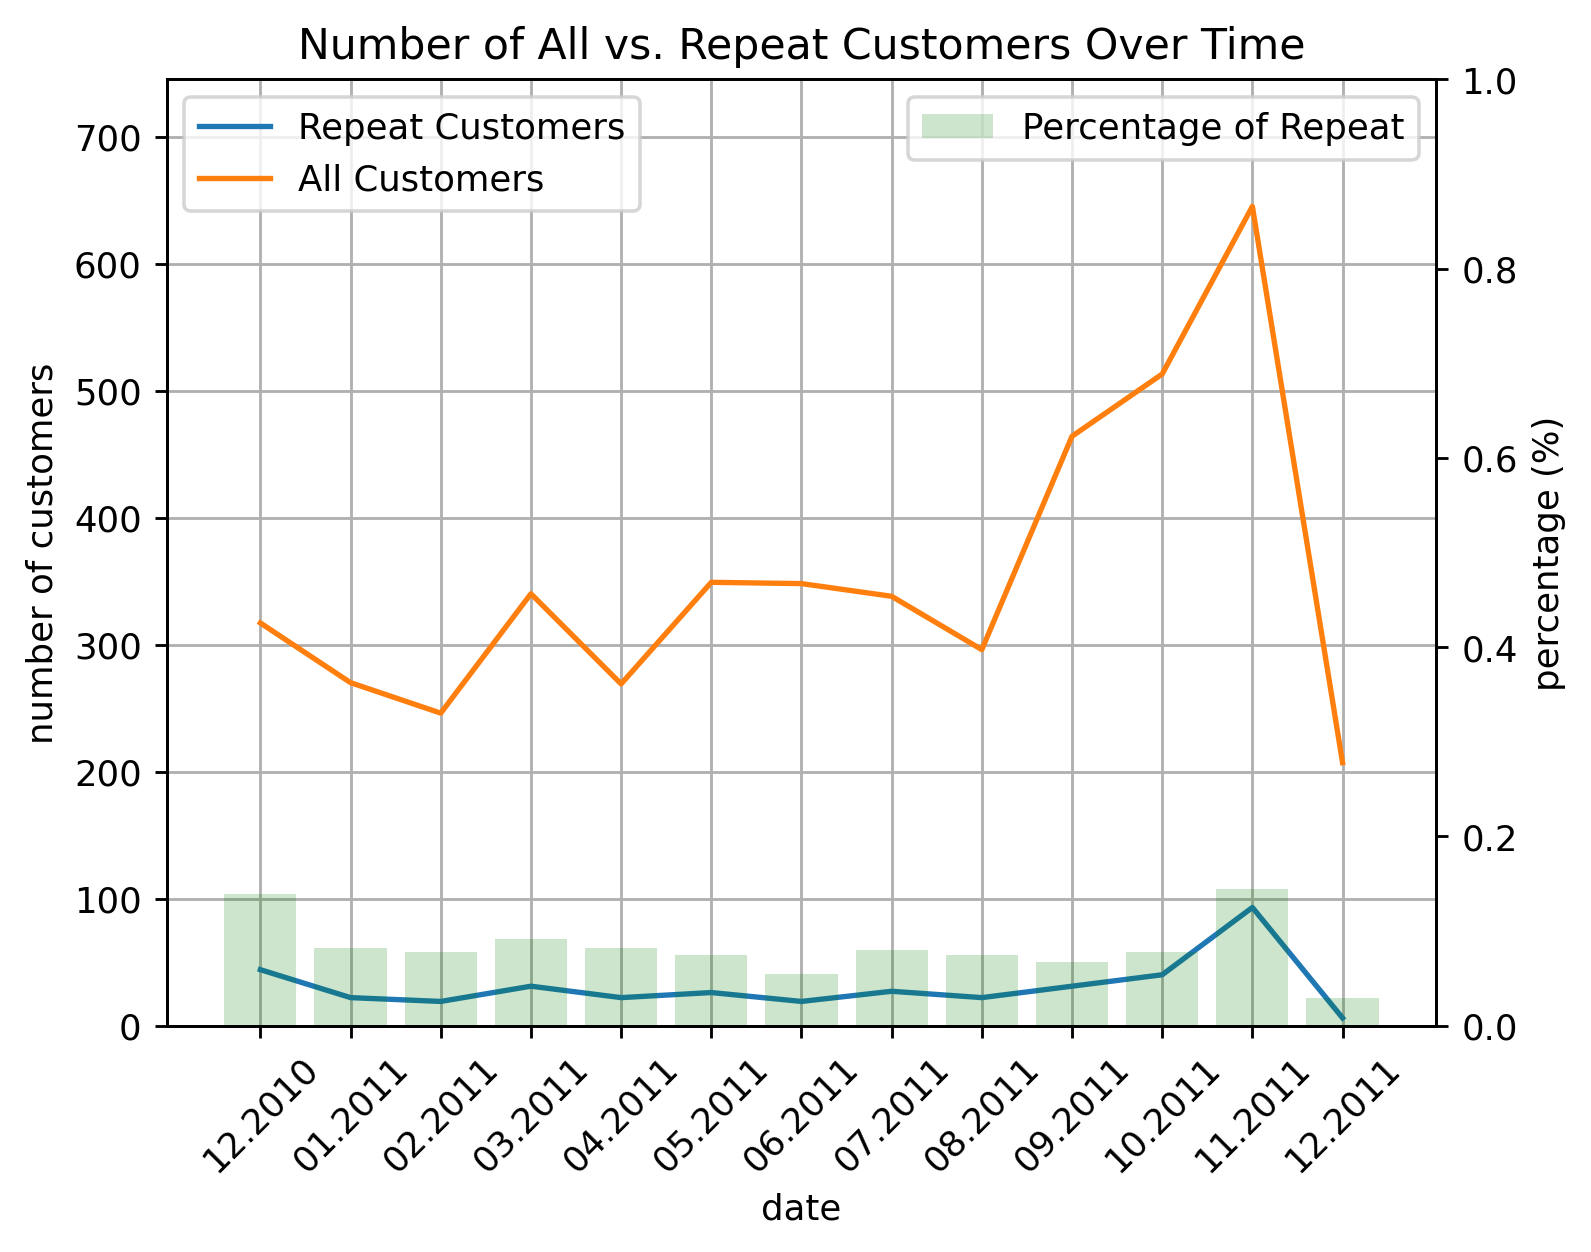

In [154]:
ax = plt.subplot()

plt.grid()

x_labels = [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index]

# 每個月回頭客數量, 折線圖
ax.plot(x_labels, monthly_repeat_customers_df.values)

# 每個月所有顧客數量, 折線圖
ax.plot(x_labels, monthly_unique_customers_df.values)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax.legend(['Repeat Customers', 'All Customers'],loc='upper left')
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])

# 每月回頭客比例，百分比，長條圖 (把這個圖表加入上述的折線圖)
ax2 = ax.twinx()

ax2.bar(
    x_labels,
    monthly_repeat_percentage.fillna(0).values,
    color='green',
    alpha=0.2
)

ax2.set_ylabel('percentage (%)')
ax2.legend(['Percentage of Repeat'])
ax2.set_ylim([0, 1])

ax.tick_params(axis='x', labelrotation=45)
plt.show()

## 問題: 計算每個月回頭客總銷售額、計算每個月所有顧客總銷售額、計算每月回頭客總銷售額與每月所有頧客總銷售額比例，並繪圖

In [161]:
monthly_repeated_sales_df = (
    invoice_summary_df
        .groupby([
            pd.Grouper(key='InvoiceDate', freq='ME'), 'CustomerID'
        ])
        # filter>1 代表用兩個維度做分群後，筆數>1，即同一個月同一顧客有1筆以上消費
        .filter(lambda x: len(x) > 1)
        .set_index('InvoiceDate')
        .resample('ME')['Sales']
        .sum()
)

monthly_repeated_sales_df

InvoiceDate
2010-12-31    2883.32
2011-01-31    1973.78
2011-02-28    1586.32
2011-03-31    4275.27
2011-04-30    1075.79
2011-05-31    1735.97
2011-06-30    1975.69
2011-07-31    2760.31
2011-08-31    1829.85
2011-09-30    5849.65
2011-10-31    2097.68
2011-11-30    6953.67
2011-12-31     577.58
Freq: ME, Name: Sales, dtype: float64

In [163]:
monthly_total_sales_df = df.set_index('InvoiceDate').resample('ME')['Sales'].sum()

monthly_total_sales_df

InvoiceDate
2010-12-31    13095.060
2011-01-31     7954.460
2011-02-28     7973.250
2011-03-31    13865.690
2011-04-30     7296.370
2011-05-31    10909.720
2011-06-30    11383.030
2011-07-31    11896.610
2011-08-31     8898.600
2011-09-30    17647.141
2011-10-31    14858.720
2011-11-30    19773.020
2011-12-31     6768.900
Freq: ME, Name: Sales, dtype: float64

In [165]:
monthly_repeat_sales_percentage = (monthly_repeated_sales_df / monthly_total_sales_df).fillna(0)

monthly_repeat_sales_percentage

InvoiceDate
2010-12-31    0.220184
2011-01-31    0.248135
2011-02-28    0.198955
2011-03-31    0.308334
2011-04-30    0.147442
2011-05-31    0.159121
2011-06-30    0.173565
2011-07-31    0.232025
2011-08-31    0.205633
2011-09-30    0.331479
2011-10-31    0.141175
2011-11-30    0.351675
2011-12-31    0.085328
Freq: ME, Name: Sales, dtype: float64

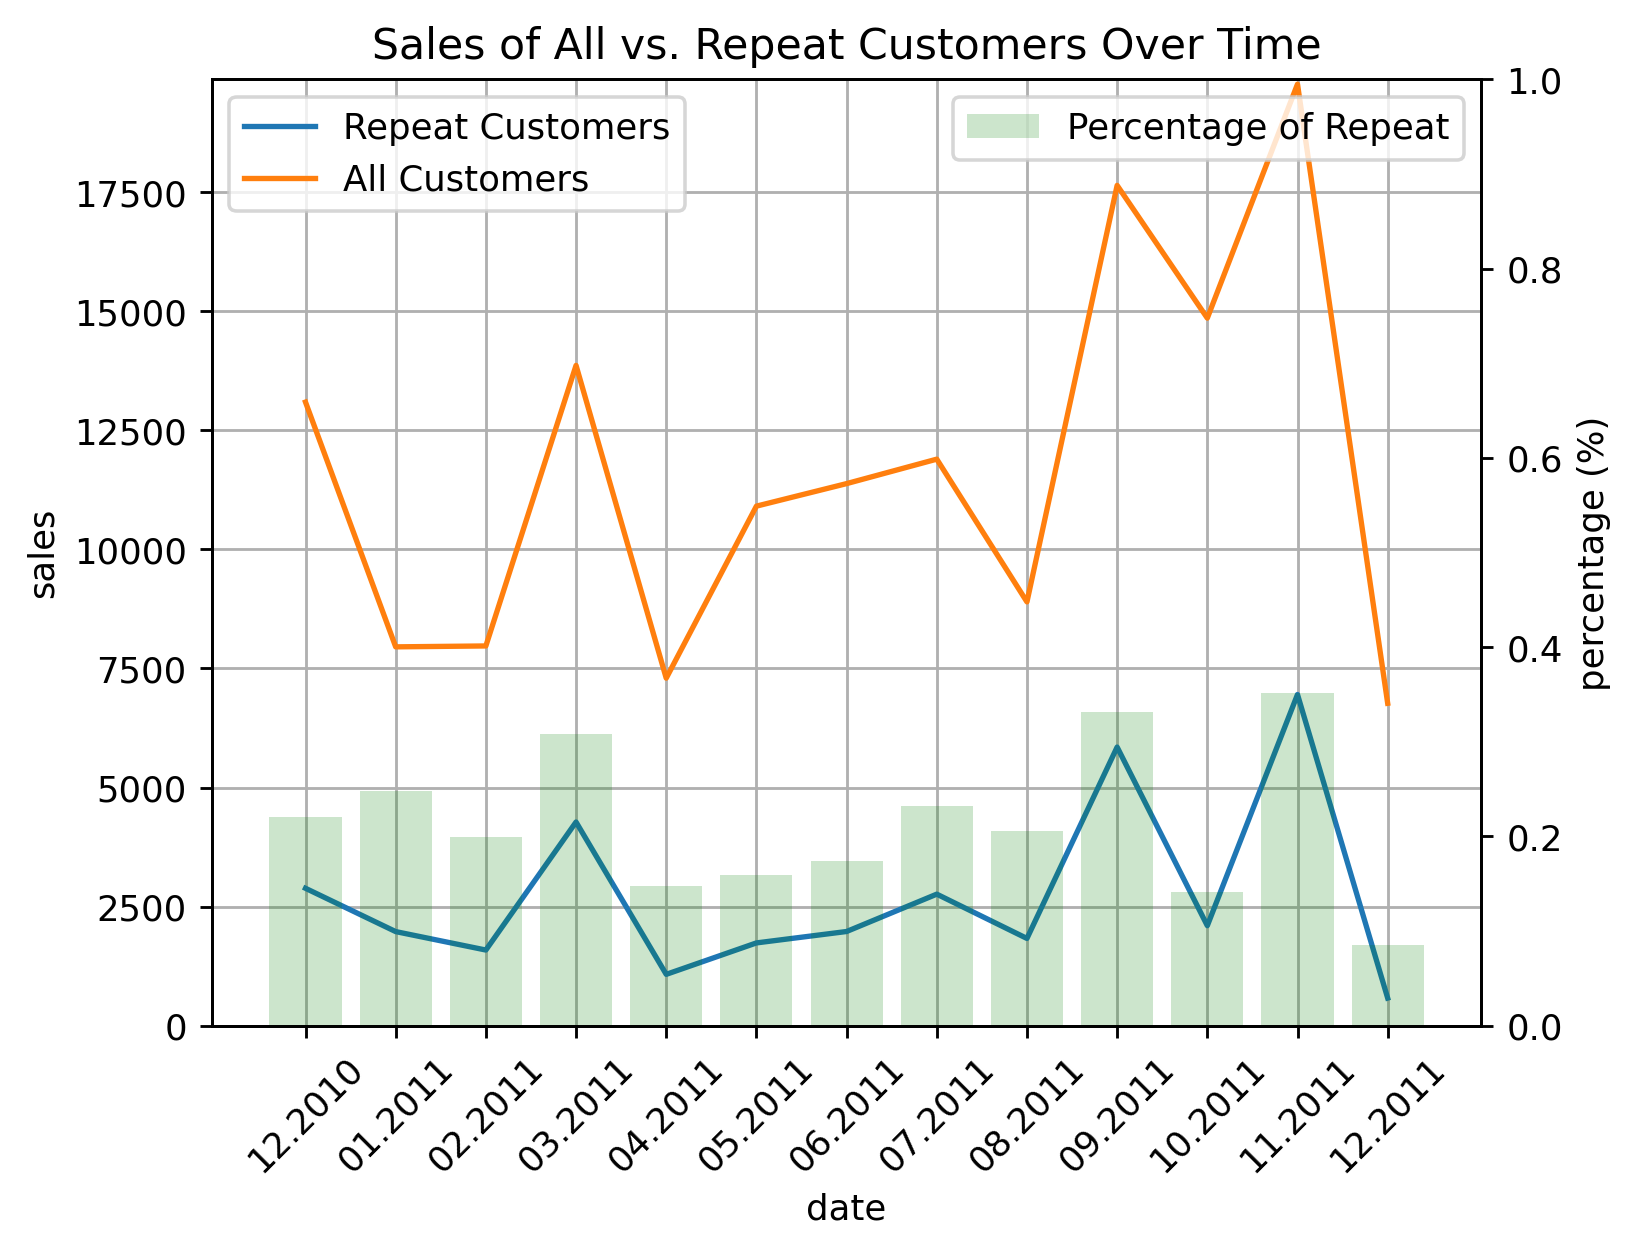

In [166]:
ax = plt.subplot()

plt.grid()

x_labels = [x.strftime('%m.%Y') for x in monthly_repeated_sales_df.index]

# 每個月回頭客數量, 折線圖
ax.plot(x_labels, monthly_repeated_sales_df.values)

# 每個月所有顧客數量, 折線圖
ax.plot(x_labels, monthly_total_sales_df.values)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Sales of All vs. Repeat Customers Over Time')
ax.legend(['Repeat Customers', 'All Customers'],loc='upper left')
ax.set_ylim([0, monthly_total_sales_df.values.max()+100])

# 每月回頭客比例，百分比，長條圖 (把這個圖表加入上述的折線圖)
ax2 = ax.twinx()

ax2.bar(
    x_labels,
    monthly_repeat_sales_percentage.values,
    color='green',
    alpha=0.2
)

ax2.set_ylabel('percentage (%)')
ax2.legend(['Percentage of Repeat'])
ax2.set_ylim([0, 1])

ax.tick_params(axis='x', labelrotation=45)
plt.show()